In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

## Part 1) Data Exploration and Evaluation

In [3]:
df_loan = pd.read_csv("lending-club-loan-data/loan.csv",low_memory=False)

In [4]:
df_loan.shape

(887379, 74)

In [6]:
df_loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


In [5]:
# per instruction, only use these cols 
cols_keep = ['loan_amnt','funded_amnt','term','int_rate','grade',\
            'annual_inc','issue_d','dti','revol_bal','total_pymnt',\
            'loan_status']

In [7]:
df_loan = df_loan.loc[:,cols_keep]

In [8]:
df_loan.shape

(887379, 11)

In [9]:
# ==================================
# Column summaries
# ==================================
#data = train_df

def get_meta_data(data):
    # Define metrics to be determined for each column
    metrics = []
    metrics.append(data.dtypes)
    metrics.append(data.apply(lambda x: x.nunique(), axis=0))
    
    metrics.append(data.apply(lambda x: x.isnull().sum(), axis=0))

    metrics.append(data.apply(lambda x: (x==" ").sum(), axis=0))

    # Summarize
    data_meta = pd.concat(metrics, axis=1)
    data_meta.columns = ['data_type', 'count_unique', 'count_null', 
                         'count_blank']
    # we DO NOT WANT TO COUNG BLANK AS MISSING HERE
#     data_meta['ppn_missing'] = (data_meta['count_null'] + 
#                                 data_meta['count_missing_passive'] + 
#                                 data_meta['count_missing_confirmed'] + 
#                                 data_meta['count_blank']) / len(data)
    data_meta['ppn_missing'] = (data_meta['count_null'] 
                                ) / len(data)
    return data_meta

In [10]:
meta = get_meta_data(df_loan)

In [11]:
# look at column summaries - sumary statistics #1
meta

,data_type,count_unique,count_null,count_blank,ppn_missing
loan_amnt,float64,1372,0,0,0.000000
funded_amnt,float64,1372,0,0,0.000000
term,object,2,0,0,0.000000
int_rate,float64,542,0,0,0.000000
grade,object,7,0,0,0.000000
annual_inc,float64,49384,4,0,0.000005
issue_d,object,103,0,0,0.000000
dti,float64,4086,0,0,0.000000
revol_bal,float64,73740,0,0,0.000000
total_pymnt,float64,506726,0,0,0.000000


we don't have any missing values in the dataset except 
a small amount in annual income, let's explore the col first and 
then impute with k-means based imputation

We will also need to deal with data types for term, grade, and issue_d

In [36]:
# the annual income sneak-peek
df_loan.annual_inc.value_counts().head() 


60000.0    34281
50000.0    30575
65000.0    25498
70000.0    24121
40000.0    23943
Name: annual_inc, dtype: int64

In [17]:
# Method to impute missing values from continuous variables using k-means clustering
def kmeans_missing(X, n_clusters, max_iter=10):

    # Initialize missing values to their column means
    missing = ~np.isfinite(X)
    mu = np.nanmean(X, 0, keepdims=1)
    X_hat = np.where(missing, mu, X)

    for i in range(max_iter):
        if i > 0:
            cls = KMeans(n_clusters, init=prev_centroids)
        else:
            cls = KMeans(n_clusters, n_init=1,n_jobs=-1)

        # Perform clustering on the filled-in data
        labels = cls.fit_predict(X_hat)
        centroids = cls.cluster_centers_

        # Fill in the missing values based on their cluster centroids
        X_hat[missing] = centroids[labels][missing]

        # When the labels have stopped changing then we have converged
        if i > 0 and np.all(labels == prev_labels):
            break

        prev_labels = labels
        prev_centroids = cls.cluster_centers_

    return X_hat

In [21]:
df_loan.loc[:,['annual_inc']] = kmeans_missing(df_loan.loc[:,['annual_inc']],n_clusters=10,max_iter=10) # this will only work for numerical columns!

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


In [22]:
meta = get_meta_data(df_loan)
meta

,data_type,count_unique,count_null,count_blank,ppn_missing
loan_amnt,float64,1372,0,0,0.0
funded_amnt,float64,1372,0,0,0.0
term,object,2,0,0,0.0
int_rate,float64,542,0,0,0.0
grade,object,7,0,0,0.0
annual_inc,float64,49385,0,0,0.0
issue_d,object,103,0,0,0.0
dti,float64,4086,0,0,0.0
revol_bal,float64,73740,0,0,0.0
total_pymnt,float64,506726,0,0,0.0


No more missing values now!

In [24]:
# deal with data types and explore data further
# term unique vals
df_loan.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [26]:
# loan grade unique vals
df_loan.grade.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [27]:
# issue date convert to pandas daretime object
df_loan['issue_d']=pd.to_datetime(df_loan['issue_d'])

In [28]:
df_loan.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

In [29]:
# convert to categorical where appropriate
cols_categorical = ['term','grade','loan_status']
for c in cols_categorical:
    df_loan[c] = df_loan[c].astype('category')

## EDA to better understand the distribution of features

In [30]:
df_loan.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'grade', 'annual_inc',
       'issue_d', 'dti', 'revol_bal', 'total_pymnt', 'loan_status'],
      dtype='object')

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Use

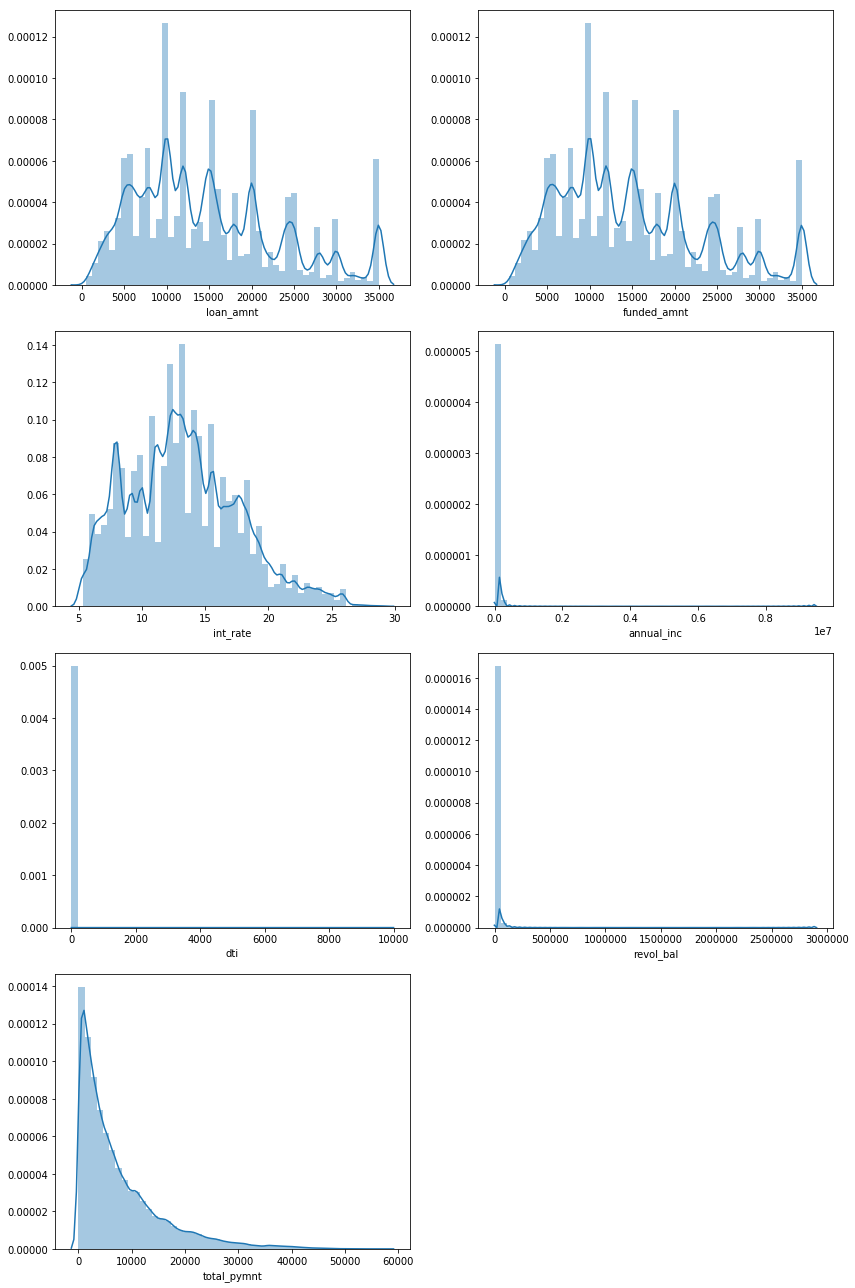

In [31]:
plot_cols = ['loan_amnt', 'funded_amnt','int_rate', 
            'annual_inc','dti', 'revol_bal', 'total_pymnt']

plt.figure(figsize=(12,18))
for i,c in enumerate(plot_cols):
    plt.subplot(4,2,i+1)
    sns.distplot(df_loan.loc[:,c])
    
plt.tight_layout()
plt.show()

loan_amnt seems normally distributed, but with a high spread, as well as funded_amnt, but seems the distribution is "normal enough" to use it for modeling later.

the annual income, dti and revol_bal are extremely skewed (for annual income in the US, this makes a lot of sense) so I will perform a log transformation of them for seeing the trends better and understanding what is going on.

total pymnt has a higher density of loans for which less total dollars was paid.

/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/filipmichalsky/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


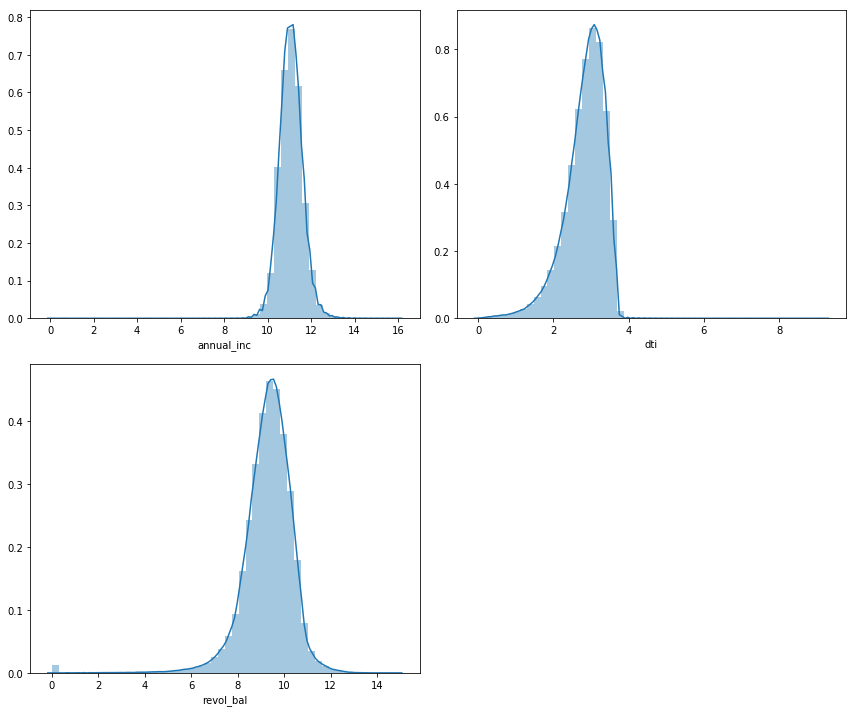

In [41]:
# convert
log_transform = ['annual_inc','dti', 'revol_bal']
plt.figure(figsize=(12,10))
for i,c in enumerate(log_transform):
    plt.subplot(2,2,i+1)
    sns.distplot(np.log(df_loan.loc[:,c]+1))
    
plt.tight_layout()
plt.show()

In [44]:
print(f'the median annual income is roughly: ${np.round(np.exp(11))}, the median dti ${np.round(np.exp(2.5))} and revolvling balance median is ${np.round(np.exp(9))}')

the median annual income is roughly: $59874.0, the median dti $12.0 and revolvling balance median is $8103.0


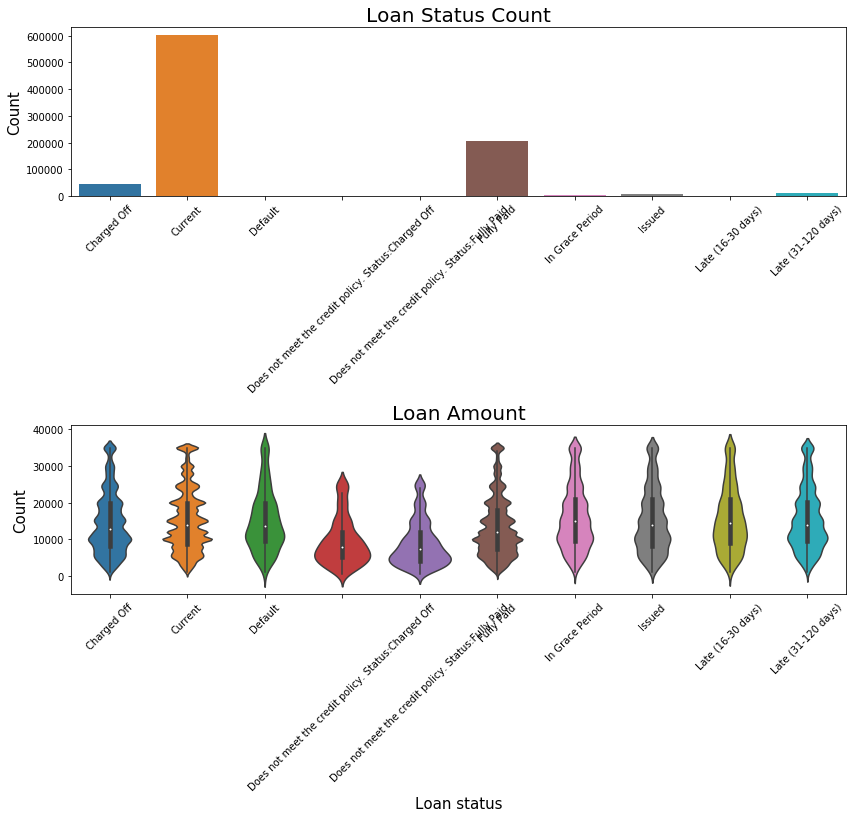

In [49]:
plt.figure(figsize = (12,14))

plt.subplot(311)
g = sns.countplot(x="loan_status", data=df_loan)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Count", fontsize=20)

plt.subplot(312)
g2 = sns.violinplot(x="loan_status", y="loan_amnt", data=df_loan)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2.set_xlabel("Loan status", fontsize=15)
g2.set_ylabel("Count", fontsize=15)
g2.set_title("Loan Amount", fontsize=20)

plt.subplots_adjust(wspace = 0.2, hspace = 0.7,top = 0.9)
plt.tight_layout()
plt.show()

From the countplot above, we can clearly see that the majority of loans is 'current', with a small number of loans fully apid or charged off.

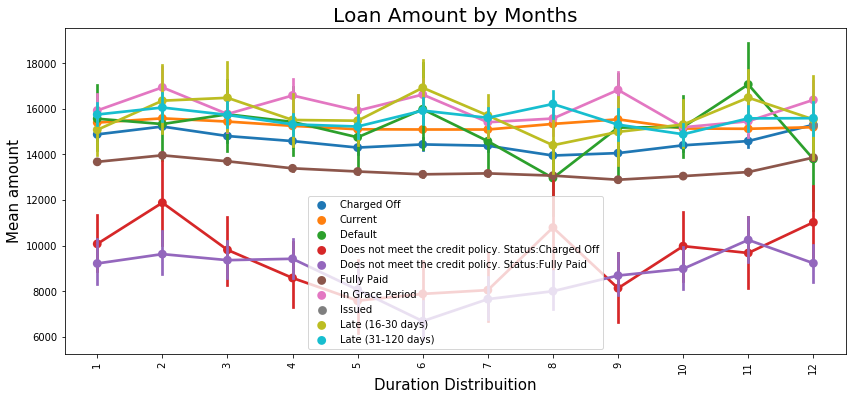

In [48]:
months_order = ["Jan", "Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
df_loan['issue_month'] = df_loan.issue_d.dt.month
#df_loan['issue_month'] = pd.Categorical(df_loan['issue_month'],categories=months_order, ordered=True)

#Issue_d x loan_amount
plt.figure(figsize = (14,6))

g = sns.pointplot(x='issue_month', y='loan_amnt', 
                  data=df_loan, 
                  hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Duration Distribuition", fontsize=15)
g.set_ylabel("Mean amount", fontsize=15)
g.legend(loc='best')
g.set_title("Loan Amount by Months", fontsize=20)
plt.show()

Above, we can see the distribution of mean loan amount by months in each category of loan status.

Not suprisingly, loans which do not meet credit policy have much lower average loan amount. Of note, combining with the plot above, keep in mind that majority of the loans in this dataset are actually 'current'

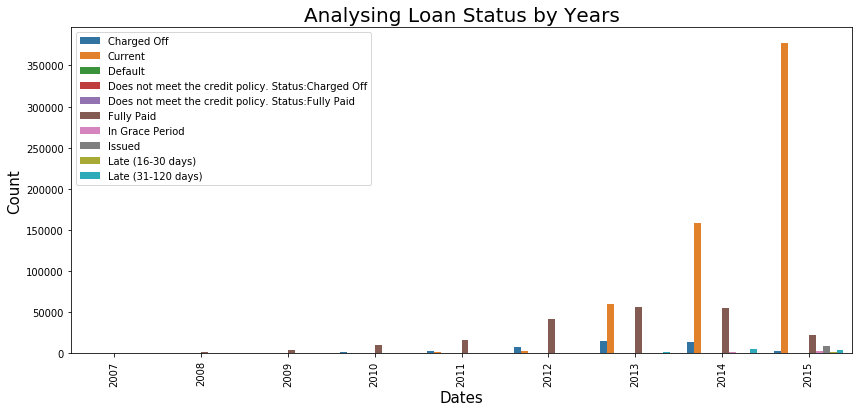

In [51]:
df_loan['issue_year'] = df_loan.issue_d.dt.year
plt.figure(figsize = (14,6))
#Looking the count of defaults though the issue_d that is The month which the loan was funded
g = sns.countplot(x='issue_year', data=df_loan,
                  hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Dates", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.legend(loc='upper left')
g.set_title("Analysing Loan Status by Years", fontsize=20)
plt.show()

## summary statistics for continuous cols



## summary statistics for categorical cols